# SETUP

The first part of the code sets up the pca_wavelet network, the training comes later. Most of this code comes from the original authors

In [1]:
import sys
sys.path.append('../segmentation_helper')

import tensorflow as tf
import keras
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import data_loader as dl
import model_broker as mb
import os

GPU device not found
Found GPU at: 


In [2]:
tf.keras.backend.set_floatx("float64")

In [3]:
loader = dl.DataLoader(IMAGE_SIZE=128)
img_train,img_test = loader.import_processed_img()
seg_train,seg_test = loader.import_processed_seg()
combined_train, combined_test = loader.import_processed_combined()

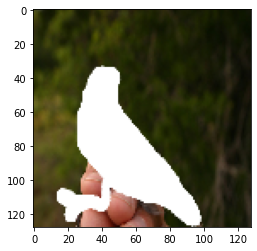

In [4]:
plt.imshow((next(iter(seg_train))[0]))

In [5]:
broker = mb.ModelBroker()
#seghead,seginvhead = broker.build_model(seg_train,seg_test,dirname="bird_seg",keep_percent=0.3,count=2,samplesize=100)
seghead,seginvhead = broker.load_model(seg_train,seg_test,dirname="bird_seg",keep_percent=0.3,count=2)
#imghead,imginvhead = broker.build_model(img_train,img_test,dirname="bird_img",keep_percent=0.3,count=2,samplesize=100)
imghead,imginvhead = broker.load_model(img_train,img_test,dirname="bird_img",keep_percent=0.3,count=2)

keep_percent 0.2434322477800738
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 6 keep_max 12.0
keep_channels 6
ufilts.shape (1, 1, 1, 27, 6)
end loop 64.0
Starting level 1


C:\Users\spurl\AppData\Local\Temp\__autograph_generated_filef_e5uapn.py:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ag__.if_stmt((ag__.ld(self).data_format is 'channels_first'), if_body, else_body, get_state, set_state, ('pad',), 1)
C:\Users\spurl\AppData\Local\Temp\__autograph_generated_filef_e5uapn.py:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ag__.if_stmt((ag__.ld(self).data_format is 'channels_last'), if_body_1, else_body_1, get_state_1, set_state_1, ('pad',), 1)


Completing 32.0
pca shape tf.Tensor([54 54], shape=(2,), dtype=int32)
keep_channels 13 keep_max 96.0
keep_channels 13
ufilts.shape (1, 1, 1, 54, 13)
end loop 32.0
sample.shape (128, 128, 3)
after reshape: sample.shape (1, 128, 128, 3)
loading from: models/bird_seg
out.shape (1, 32, 32, 13)
keep_percent 0.2434322477800738
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 6 keep_max 12.0
keep_channels 6
ufilts.shape (1, 1, 1, 27, 6)
end loop 64.0
Starting level 1
Completing 32.0
pca shape tf.Tensor([54 54], shape=(2,), dtype=int32)
keep_channels 13 keep_max 96.0
keep_channels 13
ufilts.shape (1, 1, 1, 54, 13)
end loop 32.0
sample.shape (128, 128, 3)
after reshape: sample.shape (1, 128, 128, 3)
loading from: models/bird_img
out.shape (1, 32, 32, 13)


sample.shape (128, 128, 3)
array([[[6.32923603e-01, 5.60774744e-01, 4.64148670e-01],
        [5.79963267e-01, 5.01715660e-01, 3.72709870e-01],
        [5.10420501e-01, 4.45446551e-01, 3.94561887e-01],
        ...,
        [3.56393635e-01, 3.71509284e-01, 2.95323998e-01],
        [3.67794514e-01, 3.79559219e-01, 2.97206283e-01],
        [3.74048352e-01, 3.80702376e-01, 2.78157562e-01]],

       [[7.10229039e-01, 6.38537824e-01, 5.36220908e-01],
        [7.35296071e-01, 6.76166177e-01, 5.81483662e-01],
        [6.99096203e-01, 6.29674137e-01, 5.31696200e-01],
        ...,
        [3.55208337e-01, 3.64089310e-01, 2.82661229e-01],
        [3.72780710e-01, 3.76395911e-01, 2.93368965e-01],
        [3.77267182e-01, 3.77267182e-01, 2.83149540e-01]],

       [[4.11728352e-01, 3.37463647e-01, 2.44387642e-01],
        [5.41385233e-01, 4.55664068e-01, 3.65224808e-01],
        [5.97505033e-01, 5.15642226e-01, 4.20264632e-01],
        ...,
        [3.54473025e-01, 3.62806380e-01, 2.86580890e-01],
  

array([[[6.32923603e-01, 5.60774744e-01, 4.64148670e-01],
        [5.79963267e-01, 5.01715660e-01, 3.72709870e-01],
        [5.10420501e-01, 4.45446551e-01, 3.94561887e-01],
        ...,
        [3.56393635e-01, 3.71509284e-01, 2.95323998e-01],
        [3.67794514e-01, 3.79559219e-01, 2.97206283e-01],
        [3.74048352e-01, 3.80702376e-01, 2.78157562e-01]],

       [[7.10229039e-01, 6.38537824e-01, 5.36220908e-01],
        [7.35296071e-01, 6.76166177e-01, 5.81483662e-01],
        [6.99096203e-01, 6.29674137e-01, 5.31696200e-01],
        ...,
        [3.55208337e-01, 3.64089310e-01, 2.82661229e-01],
        [3.72780710e-01, 3.76395911e-01, 2.93368965e-01],
        [3.77267182e-01, 3.77267182e-01, 2.83149540e-01]],

       [[4.11728352e-01, 3.37463647e-01, 2.44387642e-01],
        [5.41385233e-01, 4.55664068e-01, 3.65224808e-01],
        [5.97505033e-01, 5.15642226e-01, 4.20264632e-01],
        ...,
        [3.54473025e-01, 3.62806380e-01, 2.86580890e-01],
        [3.68872553e-01, 3.66

pred.shape (1, 32, 32, 13)
recon.shape (128, 128, 3)


sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  24.955033780265698
ncc =  [[1.         0.97791106]
 [0.97791106 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.55987865 0.57738781 0.23461436 0.13071194]
 [0.56024241 0.54968601 0.14361021 0.22443704]
 [0.56345361 0.21195045 0.05537684 0.0295324 ]
 [0.55403072 0.5539695  0.54950982 0.55507243]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.58036284 0.50113277 0.29247239 0.07074479]
 [0.54264683 0.44811701 0.25611359 0.06371873]
 [0.54628703 0.48639841 0.38348552 0.24585739]
 [0.53095121 0.49370341 0.50290746 0.42572668]], shape=(4, 4), dtype=float64)


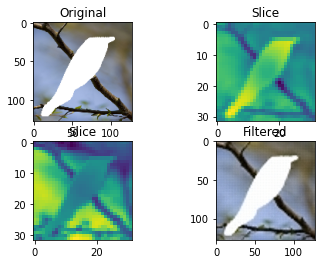

In [6]:
broker.check_build(seghead,seginvhead,seg_train)

sample.shape (128, 128, 3)
array([[[0.60575694, 0.49203143, 0.49987459],
        [0.59057522, 0.4821806 , 0.46226639],
        [0.54705882, 0.45145625, 0.41065219],
        ...,
        [0.52218139, 0.44699758, 0.39411765],
        [0.50962299, 0.43443915, 0.38155925],
        [0.47389513, 0.4033069 , 0.34975299]],

       [[0.59485006, 0.50643098, 0.50453144],
        [0.57886893, 0.49437138, 0.46612382],
        [0.56056416, 0.48349896, 0.43584177],
        ...,
        [0.55162185, 0.47711205, 0.41448951],
        [0.51573032, 0.44122052, 0.37859797],
        [0.46586436, 0.3991977 , 0.33265358]],

       [[0.58335251, 0.50602406, 0.50155103],
        [0.57949126, 0.50729549, 0.4752633 ],
        [0.57455003, 0.51305437, 0.45984411],
        ...,
        [0.58831   , 0.51772177, 0.43144724],
        [0.54079068, 0.47020239, 0.38392788],
        [0.49622977, 0.43348461, 0.34328854]],

       ...,

       [[0.13354588, 0.14531058, 0.17386451],
        [0.1397461 , 0.1515108 , 0.180064

array([[[0.60575694, 0.49203143, 0.49987459],
        [0.59057522, 0.4821806 , 0.46226639],
        [0.54705882, 0.45145625, 0.41065219],
        ...,
        [0.52218139, 0.44699758, 0.39411765],
        [0.50962299, 0.43443915, 0.38155925],
        [0.47389513, 0.4033069 , 0.34975299]],

       [[0.59485006, 0.50643098, 0.50453144],
        [0.57886893, 0.49437138, 0.46612382],
        [0.56056416, 0.48349896, 0.43584177],
        ...,
        [0.55162185, 0.47711205, 0.41448951],
        [0.51573032, 0.44122052, 0.37859797],
        [0.46586436, 0.3991977 , 0.33265358]],

       [[0.58335251, 0.50602406, 0.50155103],
        [0.57949126, 0.50729549, 0.4752633 ],
        [0.57455003, 0.51305437, 0.45984411],
        ...,
        [0.58831   , 0.51772177, 0.43144724],
        [0.54079068, 0.47020239, 0.38392788],
        [0.49622977, 0.43348461, 0.34328854]],

       ...,

       [[0.13354588, 0.14531058, 0.17386451],
        [0.1397461 , 0.1515108 , 0.18006474],
        [0.15655638, 0

pred.shape (1, 32, 32, 13)


recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  24.840038732183555
ncc =  [[1.         0.95811341]
 [0.95811341 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.65604895 0.62615854 0.60527253 0.57130635]
 [0.61887544 0.60968518 0.58664024 0.56880844]
 [0.62071371 0.58633482 0.56280643 0.58504903]
 [0.60269606 0.60423368 0.59178638 0.58934689]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.67048272 0.61683956 0.62498861 0.57879732]
 [0.63970144 0.5883106  0.59496585 0.55007694]
 [0.64606751 0.59976162 0.61302625 0.57223076]
 [0.60809447 0.56361609 0.59545077 0.55334336]], shape=(4, 4), dtype=float64)


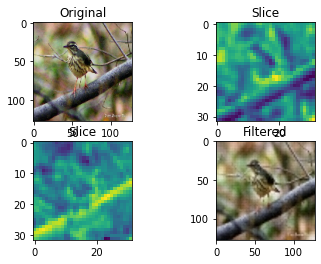

In [7]:
broker.check_build(imghead,imginvhead,img_train)

# Training

This is the loop used to find the variables to find A and b in y=Ax+b

In [8]:
imgflat = np.prod(imghead(next(iter(img_train))[0]).shape)
segflat = np.prod(seghead(next(iter(seg_train))[0]).shape)

In [9]:
reconstruct = seghead(next(iter(seg_train))[0]).shape

In [23]:
end_shape = next(iter(seg_train))[0].shape

In [10]:
n = 0.0


xxt = np.zeros([1,imgflat])
yxt = np.zeros([1,segflat])
x = np.zeros([1,imgflat])
y = np.zeros([1,segflat]) 

bar = tqdm.notebook.tqdm(total = int(combined_train.cardinality()))

for item in iter(combined_train):
    bar.update(1)
    image = item[0][0]
    segmentation = item[0][1]
    
    imgdecom = imghead(image)
    segdecom = seghead(segmentation)
    
    mat = tf.reshape(imgdecom,[1,-1])
    segmat = tf.reshape(segdecom,[1,-1])
    
    cov = tf.matmul(mat,tf.transpose(mat))
    xxt += cov
    del cov
    segcov = tf.matmul(mat,tf.transpose(segmat))
    yxt += segcov
    del segcov
    x+=mat
    y+=segmat
    
    n += 1

  0%|          | 0/3000 [00:00<?, ?it/s]

In [10]:
directory = "pca_vars/"+"seg2img"
if not os.path.exists(directory):
    os.makedirs(directory)

In [12]:
np.save(directory+"/xxt",xxt)
np.save(directory+"/yxt",yxt)
np.save(directory+"/x",x)
np.save(directory+"/y",y)
np.save(directory+"/n",n)

## Calculating A and B

This section uses the values found in the training loop to calculate values for A and B

In [11]:
xxt = np.load(directory+"/xxt.npy")
yxt = np.load(directory+"/yxt.npy")
x = np.load(directory+"/x.npy")
y = np.load(directory+"/y.npy")
n = np.load(directory+"/n.npy")

In [12]:
xxt = (xxt - tf.matmul(x,tf.transpose(x)))/n
yxt = (yxt - tf.matmul(x,tf.transpose(y)))/n

In [13]:
inverse_xxt = tf.linalg.pinv(xxt)

In [14]:
A = tf.reduce_sum(tf.matmul(inverse_xxt,yxt))

In [15]:
del inverse_xxt

In [16]:
import gc
gc.collect()

20010

In [34]:
A

<tf.Tensor: shape=(), dtype=float64, numpy=12428.922795761526>

In [17]:
b = (y - A*x)/n

In [18]:
img_train, img_test = loader.import_processed_img()

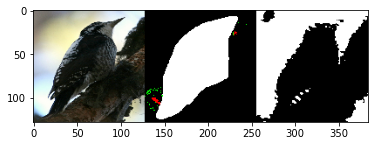

In [40]:
image,seg_base = next(iter(combined_test.shuffle(100)))[0]
imgdecom = imghead(image)
imgdecom = tf.reshape(imgdecom,(1,-1))
y = A*imgdecom + b
seg = seginvhead(tf.reshape(y,(reconstruct)))
seg = tf.reshape(np.repeat(tf.reduce_max(seg[0],2),3),(end_shape))
plt.imshow(np.hstack([image,seg_base==1,seg>0.9]))